                       Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count  User_Score  User_Count Developer Rating

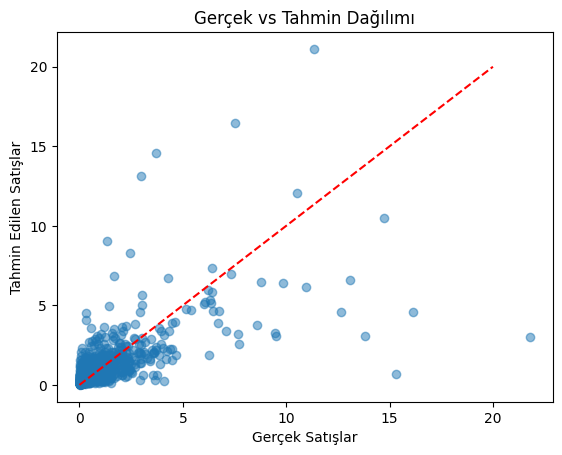

Veri doldurma işlemi tamamlandı. Yeni veri boyutu: (6893, 14)
Kategorik dönüşüm sonrası sütun sayısı: 40
Yeni R2 Skoru: 0.04890526173312504
Yeni RMSE: 1.9814329047223718


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Veriyi oku
df = pd.read_csv("/kaggle/input/games-data/Video_Games_Sales_as_at_22_Dec_2016.csv")

# İlk bakış
print(df.head())
print(df.info())
# 1. 'tbd' yazanları NaN (boş) yapıp sütunu sayısal formata çeviriyoruz
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')


df = df.dropna(subset=['Year_of_Release', 'Publisher', 'Critic_Score', 'User_Score'])

# Gereksiz sütunları atma (Oyun ismi satış tahmininde genelde kullanılmaz, isimden tahmin zordur)
df = df.drop(['Name', 'Developer'], axis=1)

print("Temizlik sonrası veri boyutu:", df.shape)
# 'Platform', 'Genre', 'Publisher' gibi sütunları 0-1 matrisine çeviriyoruz
df_encoded = pd.get_dummies(df, columns=['Platform', 'Genre', 'Rating'], drop_first=True)

# Biz burada basitlik adına 'Publisher'ı atıp devam edelim:
if 'Publisher' in df_encoded.columns:
    df_encoded = df_encoded.drop('Publisher', axis=1)
    # X: Özellikler, y: Hedefimiz (Global Sales)
X = df_encoded.drop(['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1)
# Not: Bölgesel satışları da siliyoruz çünkü Global_Sales zaten bunların toplamı. Cevabı (Target) ipucu olarak vermemeliyiz.

y = df_encoded['Global_Sales']

# Eğitim ve Test seti ayırma (%80 Eğitim, %20 Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli Seçelim: Random Forest genellikle bu veri setinde Linear Regression'dan daha iyi sonuç verir.
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("Model eğitildi!")
# Tahmin yap
tahminler = model.predict(X_test)

# Başarıyı ölç
r2 = r2_score(y_test, tahminler)
rmse = np.sqrt(mean_squared_error(y_test, tahminler))

print(f"R2 Skoru (Başarı Oranı): {r2:.2f}")
print(f"Hata Payı (RMSE): {rmse:.2f}")

# Basit bir görselleştirme: Gerçek vs Tahmin
plt.scatter(y_test, tahminler, alpha=0.5)
plt.xlabel("Gerçek Satışlar")
plt.ylabel("Tahmin Edilen Satışlar")
plt.title("Gerçek vs Tahmin Dağılımı")
plt.plot([0, 20], [0, 20], 'r--') # Mükemmel tahmin çizgisi
plt.show()
# Önce User_Score içindeki 'tbd' (belirlenmedi) gibi metinleri sayıya zorlayalım, hata verirse boş (NaN) yapsın
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')

# Sayısal sütunlardaki boşlukları MEDYAN ile doldur (Ortalama yerine medyan daha güvenlidir)
columns_to_fill = ['Critic_Score', 'User_Score', 'Critic_Count', 'User_Count', 'Year_of_Release']

for col in columns_to_fill:
    if col in df.columns:
        # Boş yerlere o sütunun medyanını yaz
        df[col] = df[col].fillna(df[col].median())

# Kategorik (Yazı) olan sütunlardaki boşlukları "Unknown" diye doldur (Rating vs için)
df['Rating'] = df['Rating'].fillna('Unknown')

print("Veri doldurma işlemi tamamlandı. Yeni veri boyutu:", df.shape)
# Tahmin için gereksiz olabilecek sütunları çıkarıyoruz

gereksiz_sutunlar = ['Name', 'Publisher', 'Developer', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']


df = df.drop(gereksiz_sutunlar, axis=1, errors='ignore')
# Tahmin için gereksiz olabilecek sütunları çıkarıyoruz

gereksiz_sutunlar = ['Name', 'Publisher', 'Developer', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']



df = df.drop(gereksiz_sutunlar, axis=1, errors='ignore')
# Platform, Genre ve Rating sütunlarını sayısal verilere dönüştür (Dummy Variable)
df = pd.get_dummies(df, columns=['Platform', 'Genre', 'Rating'], drop_first=True)

print("Kategorik dönüşüm sonrası sütun sayısı:", df.shape[1])
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# 1. Veriyi Oku
df = pd.read_csv("/kaggle/input/games-data/Video_Games_Sales_as_at_22_Dec_2016.csv") 

# 2. Eksikleri Doldur
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')
cols_num = ['Critic_Score', 'User_Score', 'Year_of_Release']
for col in cols_num:
    df[col] = df[col].fillna(df[col].median())

# 3. Gereksizleri At (Global_Sales HEDEF olduğu için kalmalı, diğer satışlar atılmalı)
df = df.drop(['Name', 'Publisher', 'Developer', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Count', 'User_Count'], axis=1, errors='ignore')

# 4. Kategorik Dönüşüm
df = pd.get_dummies(df, columns=['Platform', 'Genre', 'Rating'], drop_first=True)

# 5. Hedef ve Özellikleri Ayır
y = df['Global_Sales']             # Hedefimiz
X = df.drop(['Global_Sales'], axis=1) # Hedef hariç her şey

# 6. Eğitim ve Test Olarak Böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Model Kur ve Eğit
model = LinearRegression()
model.fit(X_train, y_train)

# 8. Sonuçları Gör
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Yeni R2 Skoru: {r2}")
print(f"Yeni RMSE: {rmse}")
